# Problem statement: On the basis of Gender,Age,EstimatedSalary  predict either perrson will Purchase or not

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
# drop use id
df.drop(columns='User ID',inplace=True)

In [6]:
df[:3]

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0


In [7]:
#check no. of rows and columns
df.shape

(400, 4)

In [8]:
# Output column is Purchased lets check category
df.Purchased.unique()
#hence its binary classification problem

array([0, 1], dtype=int64)

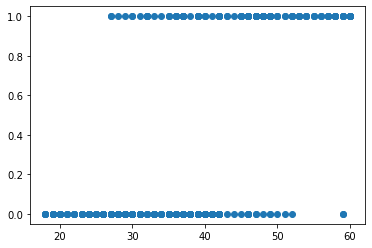

In [9]:
#check S curve
# age vs Purchased
plt.scatter(df.Age,df.Purchased)

From above graph, we can conclude, its binary classification prblem having S curve pattern

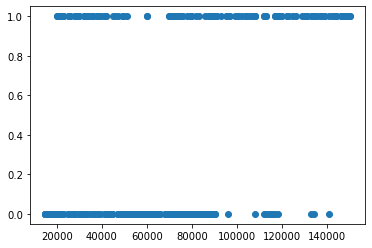

In [10]:
plt.scatter(df.EstimatedSalary,df.Purchased)

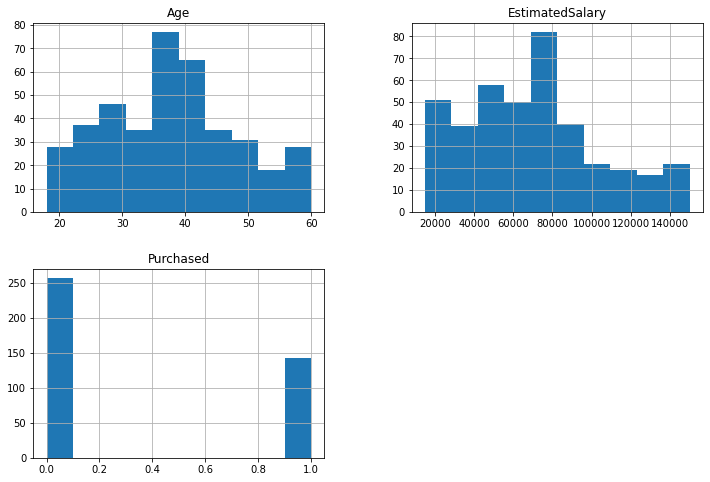

In [13]:
df.hist(figsize=(12,8))
plt.show()

In [14]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
#check missing values
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Lets creeate input and output

In [20]:
# befor creating an input, Gender column is Categorical, we must have to convert into numeric
df.Gender = df.Gender.map({'Male':0,'Female':1})

In [21]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19.0,19000.0,0
1,0,35.0,20000.0,0
2,1,26.0,43000.0,0
3,1,27.0,57000.0,0
4,0,19.0,76000.0,0
...,...,...,...,...
395,1,46.0,41000.0,1
396,0,51.0,23000.0,1
397,1,50.0,20000.0,1
398,0,36.0,33000.0,0


In [22]:
df.dtypes

Gender               int64
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

now we have all columns in numeric format

In [31]:
#lets create input
#df[['Gender', 'Age', 'EstimatedSalary']]
#df.iloc[:,:-1]
#df.loc[:,['Gender', 'Age', 'EstimatedSalary']]
X = df.drop(columns='Purchased')
X[:2]

,Gender,Age,EstimatedSalary
0,0,19.0,19000.0
1,0,35.0,20000.0


In [34]:
#output
y = df.Purchased
y[:2]

0    0
1    0
Name: Purchased, dtype: int64

# Split the dataset

In [36]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3)

In [37]:
len(X_train)

280

In [38]:
len(X_test)

120

# Call the Logistic regression algorithm

In [40]:
model = LogisticRegression()
model

LogisticRegression()

# Training

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
model.coef_ #3 coef for 3 inputs

array([[-8.86078036e-11, -1.80247862e-09, -2.03228630e-06]])

In [43]:
model.intercept_

array([-2.22806005e-10])

In [44]:
#check score of train sample
model.score(X_train,y_train)*100

63.57142857142857

# testing

In [45]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Here if anyone is not purchasing then its completely loss of my company

We have to think abt data , check outliers, check features and take appropriate actions to improve accuracy

In [51]:
#check corr among the features
df.corr().style.background_gradient(cmap='copper_r')

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


In [52]:
df
#if we check input data, EstimatedSalary dominates Gender and Age
#solution is StandardScaling [-3,+3]

,Gender,Age,EstimatedSalary,Purchased
0,0,19.0,19000.0,0
1,0,35.0,20000.0,0
2,1,26.0,43000.0,0
3,1,27.0,57000.0,0
4,0,19.0,76000.0,0
...,...,...,...,...
395,1,46.0,41000.0,1
396,0,51.0,23000.0,1
397,1,50.0,20000.0,1
398,0,36.0,33000.0,0


In [55]:
#lets apply scaling on Input data
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler()
Xn_train = sc.fit_transform(X_train)

In [56]:
Xn_train[:3]

array([[-1.        ,  0.91163551,  0.58080604],
       [ 1.        ,  0.0896958 ,  0.02854721],
       [ 1.        ,  0.63765561,  1.77252245]])

In [57]:
#now apply training on this scaled Xn_train
model.fit(Xn_train,y_train)

LogisticRegression()

In [58]:
#check score after scaling
model.score(Xn_train,y_train)*100

83.21428571428572

In [60]:
model.score(X_test,y_test)*100
#here it give less accuracy bcz i have not scaled test input

34.166666666666664

In [61]:
#Lets scale test input
Xn_test = sc.fit_transform(X_test)

In [63]:
model.score(Xn_test,y_test)*100

86.66666666666667

# When we are doing scaling, it should be performed on training input and testing input as well

In [59]:
from sklearn.metrics import mean_squared_error

In [ ]:
# When to use which cost function????????